In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/titanic/data/train.csv'
train = pd.read_csv(file_path, low_memory=False)

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Check missing values, basic statistics, and unique values

In [3]:
print(train.info())  # Check data types and missing values
print(train.describe())  # Basic statistics for numerical data
print(train.nunique())  # Check the number of unique values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

### Check the distribution of the target variable

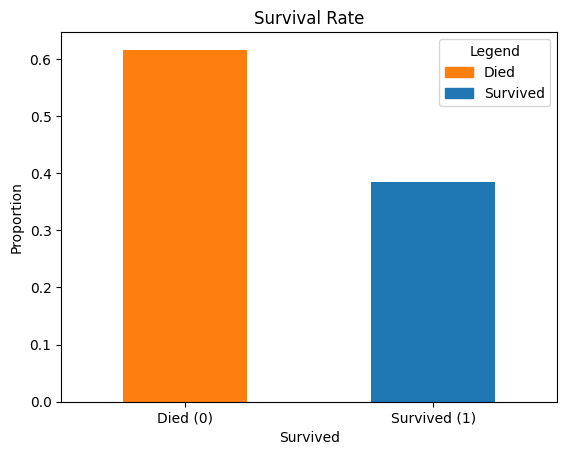

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [4]:
import matplotlib.pyplot as plt

# Set colors for the bar graph
palette_colors = ['#ff7f0e', '#1f77b4']  # Died: Orange (#ff7f0e), Survived: Blue (#1f77b4)

# Calculate the proportion of survivors and non-survivors
survival_counts = train['Survived'].value_counts(normalize=True)

# Plot the graph
ax = survival_counts.plot(
    kind='bar',
    title='Survival Rate',
    color=palette_colors
)

# Set labels for the x-axis
ax.set_xticks([0, 1])
ax.set_xticklabels(['Died (0)', 'Survived (1)'], rotation=0)

# Set label for the y-axis
ax.set_ylabel('Proportion')

# Add legend corresponding to the data
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in palette_colors]
labels = ['Died', 'Survived']
ax.legend(handles, labels, loc='upper right', title='Legend')

# Display the plot
plt.show()

# Output the proportion of survivors and non-survivors
print(survival_counts * 100)



### Key Insights
- The majority (approximately **61.6%**) did not survive.
- Only **38.4%** of the passengers survived.

### Next Steps
- Investigate the relationship between survival rate and:
  - Age
  - Gender
  - Passenger Class (Pclass)


### Investigate the relationship between survival rate and Embarked

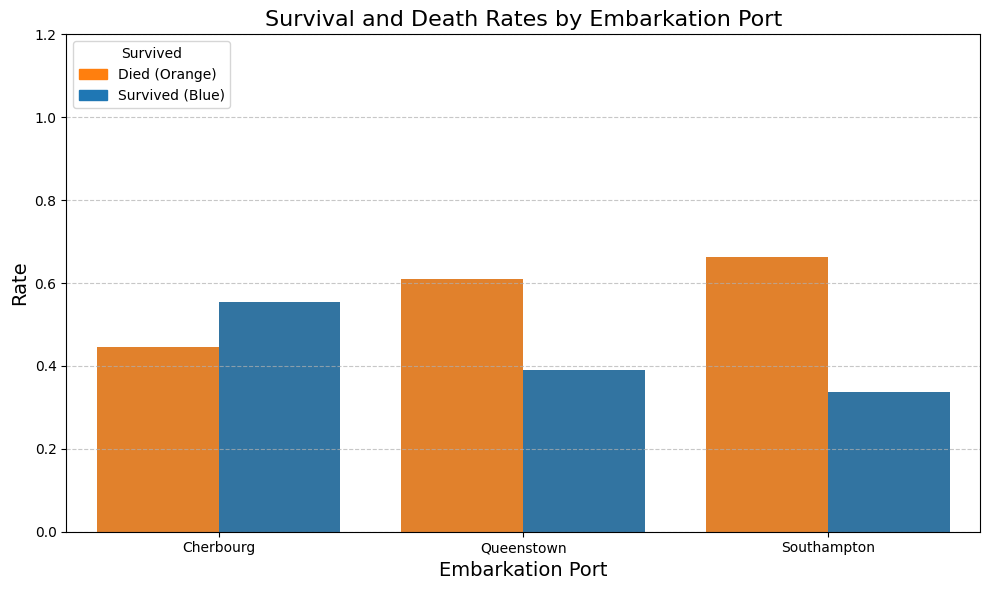

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Map actual port names to Embarked values
port_mapping = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown', 'missing': 'Missing'}
train['Embarked'] = train['Embarked'].map(port_mapping)

# Calculate the proportion of deaths and survivors for each Embarked value
embarked_counts = train.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')
embarked_total = train['Embarked'].value_counts().reset_index()
embarked_total.columns = ['Embarked', 'Total']

# Calculate the rate and merge with the original data
embarked_counts = embarked_counts.merge(embarked_total, on='Embarked')
embarked_counts['Rate'] = embarked_counts['Count'] / embarked_counts['Total']

# Visualization
plt.figure(figsize=(10, 6))

# Set bar colors
palette_colors = ['#ff7f0e', '#1f77b4']  # Died: Orange (#ff7f0e), Survived: Blue (#1f77b4)

sns.barplot(x='Embarked', y='Rate', hue='Survived', data=embarked_counts, palette=palette_colors)
plt.title('Survival and Death Rates by Embarkation Port', fontsize=16)
plt.xlabel('Embarkation Port', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.ylim(0, 1.2)

# Set legend colors and labels
legend_labels = [Patch(color='#ff7f0e', label='Died (Orange)'),
                 Patch(color='#1f77b4', label='Survived (Blue)')]

plt.legend(handles=legend_labels, title='Survived', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Insights from Survival and Death Rates by Embarkation Port

- **Cherbourg**:
  - Passengers embarking from Cherbourg have the **highest survival rate** compared to other ports.
  - The survival rate is nearly equal to the death rate, indicating a relatively balanced outcome.

- **Queenstown**:
  - Passengers from Queenstown have a **higher death rate** compared to their survival rate.
  - This suggests that passengers from this port may have had fewer chances of survival.

- **Southampton**:
  - Passengers from Southampton experienced the **highest death rate** among the three ports.
  - The survival rate is significantly lower, making this port a notable point of interest for further investigation.

### Possible Relationship
- While it is evident that passengers boarding in **Southampton (United Kingdom)** experienced a higher mortality rate, this may be influenced by several **indirect factors**:
  - **Socio-economic status**: Differences in the socio-economic background of passengers boarding at each port.
  - **Pclass distribution**: A higher proportion of lower-class passengers may have boarded in Southampton.
  - **Demographics**: Variations in **age**, **gender**, and **family composition** among passengers from different ports.
  - Other factors, such as **cabin locations** and **lifeboat availability**, might have contributed.

### Next Steps
- Investigate additional variables such as **age**, **gender**, and **family composition** to identify specific patterns
- Analyze the relationship between **Pclass**, socio-economic status, and survival rates for passengers from each port.
- Compare the overall number of passengers boarding at each port and examine how this impacts survival rates.

---


### Investigate the relationship between survival rate and Age

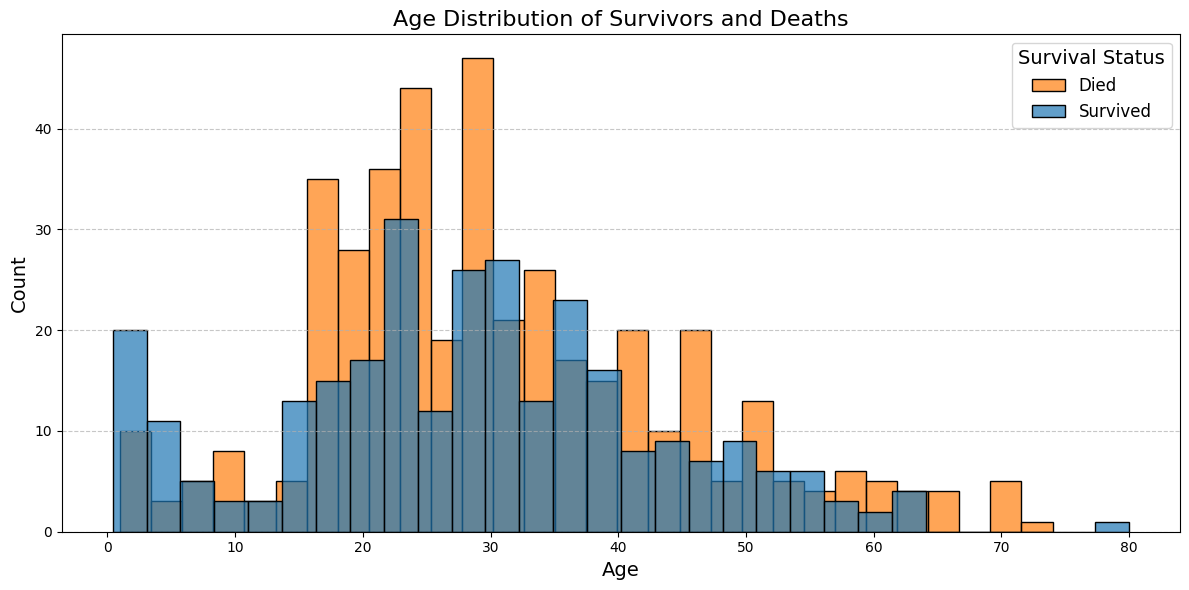

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram for deaths (Survived=0)
sns.histplot(
    data=train[train['Survived'] == 0], x='Age', bins=30, color='#ff7f0e', label='Died', kde=False, alpha=0.7
)

# Plot histogram for survivors (Survived=1)
sns.histplot(
    data=train[train['Survived'] == 1], x='Age', bins=30, color='#1f77b4', label='Survived', kde=False, alpha=0.7
)

# Add titles and labels
plt.title('Age Distribution of Survivors and Deaths', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add legend
plt.legend(title='Survival Status', fontsize=12, title_fontsize=14)

# Show the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Investigate the relationship between survival rate and Gender

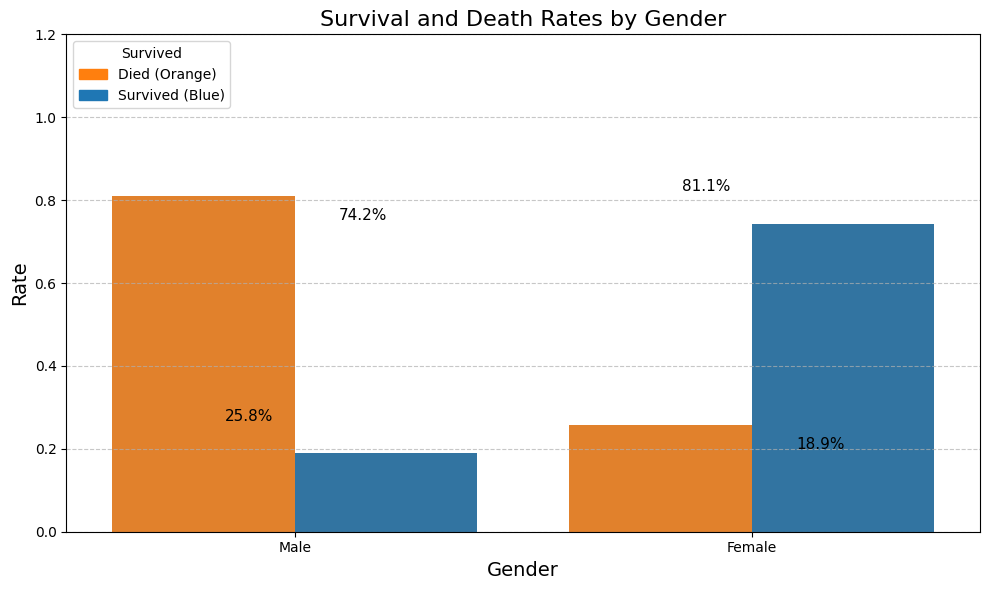

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Map the Sex column to readable labels
train['Mapped_Sex'] = train['Sex'].map({'male': 'Male', 'female': 'Female'})

# Calculate the proportion of deaths and survivors for each gender value
gender_counts = train.groupby(['Mapped_Sex', 'Survived']).size().reset_index(name='Count')
gender_total = train.groupby('Mapped_Sex')['Survived'].count().reset_index(name='Total')

# Calculate the rate and merge with the original data
gender_counts = gender_counts.merge(gender_total, on='Mapped_Sex')
gender_counts['Rate'] = gender_counts['Count'] / gender_counts['Total']

# Add survival percentage to the labels
gender_counts['Percentage'] = (gender_counts['Rate'] * 100).round(1)

# Set the correct order for the x-axis
gender_counts['Mapped_Sex'] = pd.Categorical(
    gender_counts['Mapped_Sex'], categories=['Male', 'Female'], ordered=True
)

# Visualization
plt.figure(figsize=(10, 6))

# Set bar colors
palette_colors = ['#ff7f0e', '#1f77b4']  # Died: Orange, Survived: Blue

sns.barplot(
    x='Mapped_Sex', y='Rate', hue='Survived', data=gender_counts, palette=palette_colors
)

# Add percentages to the bars
for i, row in gender_counts.iterrows():
    # Place the text slightly above the bar
    text_position = row['Rate'] + 0.01  # Add a small offset above the bar
    plt.text(
        x=i // 2 + (i % 2) * 0.25 - 0.1,  # Center text horizontally
        y=text_position,  # Slightly above the bar
        s=f"{row['Percentage']}%",  # Percentage value
        ha='center', fontsize=11, color='black'  # No bold
    )

# Add titles and labels
plt.title('Survival and Death Rates by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.ylim(0, 1.2)

# Set legend colors and labels
legend_labels = [Patch(color='#ff7f0e', label='Died (Orange)'),
                 Patch(color='#1f77b4', label='Survived (Blue)')]

plt.legend(handles=legend_labels, title='Survived', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Age Distribution by Gender and Survival Status

<Figure size 1200x800 with 0 Axes>

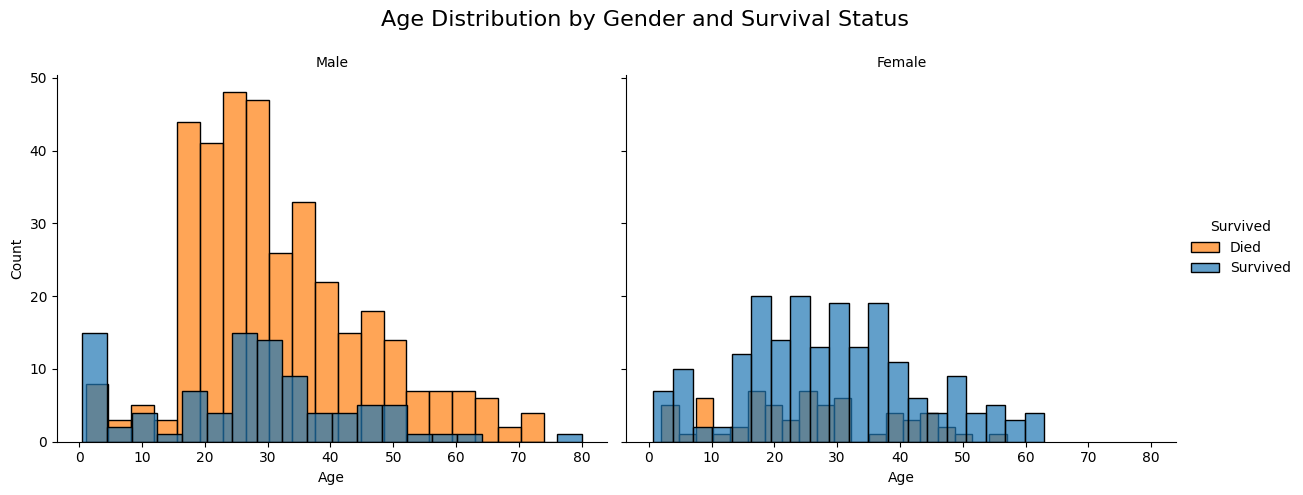

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 8))

# Create a FacetGrid for age distribution by gender and survival
g = sns.FacetGrid(train, col="Mapped_Sex", hue="Survived", palette={0: "#ff7f0e", 1: "#1f77b4"}, height=5, aspect=1.2)
g.map(sns.histplot, "Age", kde=False, bins=20, alpha=0.7)

# Set titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Count")
g.add_legend(title="Survived", labels=["Died", "Survived"])

# Add a main title
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Age Distribution by Gender and Survival Status", fontsize=16)

# Show the plot
plt.show()


### Insights from Age Distribution by Gender and Survival Status

1. **Male (Left Plot)**:
   - Most male passengers were in their **20s to 30s**, and the majority in this age group did not survive.
   - Very few male passengers under the age of 10 survived, and survival among older males (above 50) was also limited.
   - This could indicate that age alone was not a strong factor for survival among male passengers.

2. **Female (Right Plot)**:
   - The majority of female passengers, regardless of age, **survived**.
   - A significant number of female passengers were in their 20s to 40s, with a much higher survival rate compared to males in the same age group.
   - This suggests that gender played a more critical role than age for survival, particularly for women.

3. **General Observation**:
   - The stark contrast between the survival rates of males and females highlights the priority given to women during evacuation.
   - The survival of very young children appears to be inconsistent, suggesting that additional factors (e.g., family structure, class) may have influenced their outcomes.

---

### Hypothesis
- **Pclass (Passenger Class)** and **gender** likely played a significant role in survival, with women in higher classes receiving the most priority.
- Further investigation into **family size** and whether traveling alone or with dependents impacted survival rates could provide additional insights.

---

### Next Steps
1. Analyze the relationship between **family size**, **Pclass** and survival rates for different genders.
2. Investigate if there is a specific age threshold where survival rates significantly diverge for males and females.
3. Explore the influence of social structures (e.g., traveling with children or spouses) on survival outcomes.

---




### Investigate the relationship between survival rate and family size

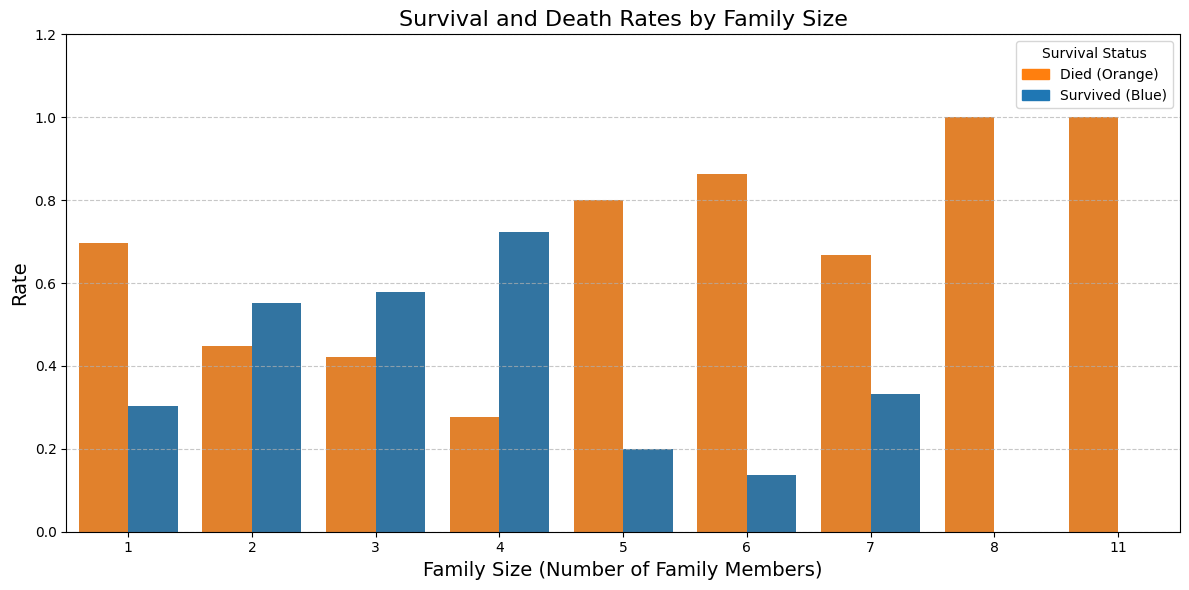

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FamilySize column
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Prepare data for visualization
family_counts = train.groupby(['FamilySize', 'Survived']).size().reset_index(name='Count')
family_total = train.groupby('FamilySize').size().reset_index(name='Total')

# Merge total counts to calculate rates
family_counts = family_counts.merge(family_total, on='FamilySize')
family_counts['Rate'] = family_counts['Count'] / family_counts['Total']

# Visualization
plt.figure(figsize=(12, 6))

# Set bar colors
palette_colors = ['#ff7f0e', '#1f77b4']  # Died: Orange, Survived: Blue

# Create barplot
sns.barplot(
    x='FamilySize', y='Rate', hue='Survived', data=family_counts, palette=palette_colors
)

# Add titles and labels
plt.title('Survival and Death Rates by Family Size', fontsize=16)
plt.xlabel('Family Size (Number of Family Members)', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.ylim(0, 1.2)

# Set legend colors and labels
legend_labels = [Patch(color='#ff7f0e', label='Died (Orange)'),
                 Patch(color='#1f77b4', label='Survived (Blue)')]

plt.legend(handles=legend_labels, title='Survival Status', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


### Insights
1. **Higher Mortality Rate for Solo Passengers (FamilySize=1)**:
   - Solo travelers may have been deprioritized during rescue efforts.
   - For example, families might have been given higher priority for lifeboats compared to individuals.

2. **Increased Survival Rate for Small Families (FamilySize 2–4)**:
   - Families with 2–4 members may have found it easier to stay together and secure spots on lifeboats.
   - Smaller family groups could navigate chaotic rescue situations more effectively.

3. **Higher Mortality Rate for Large Families (FamilySize ≥ 5)**:
   - It may have been challenging for large families to secure lifeboat spots for all members simultaneously.
   - Larger groups might have experienced delays in evacuation, reducing their chances of survival.

4. **Impact of Crowding**:
   - Large families were likely concentrated in areas (e.g., third-class cabins) that were heavily crowded, potentially delaying their escape or evacuation.

---

### Next Steps for Analysis
1. **Class (Pclass)**:
   - Examine the relationship between family size and survival across different passenger classes.
   - Since third-class passengers often had higher mortality rates, explore its effect on large families.

2. **Gender and Age**:
   - Investigate if women and children from large families had a better chance of survival due to prioritization during rescue efforts.

3. **Embarked (Port of Boarding)**:
   - Analyze whether passengers with large families were concentrated at specific ports and how this might have influenced survival.



### Investigate the relationship between survival rate and pclass

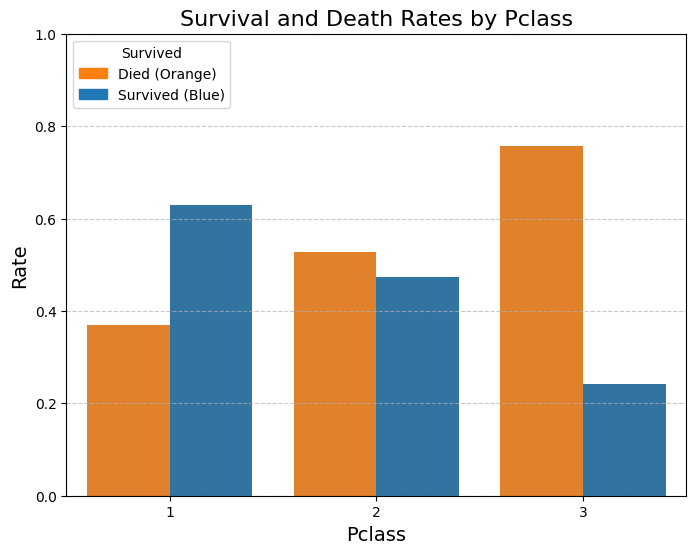

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Calculate survival and death rates for each Pclass
pclass_counts = train.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
pclass_total = train['Pclass'].value_counts().reset_index()
pclass_total.columns = ['Pclass', 'Total']

# Calculate rates and merge with the original data
pclass_counts = pclass_counts.merge(pclass_total, on='Pclass')
pclass_counts['Rate'] = pclass_counts['Count'] / pclass_counts['Total']

# Set bar colors
palette_colors = ['#ff7f0e', '#1f77b4']  # Died: Orange (#ff7f0e), Survived: Blue (#1f77b4)

# Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Rate', hue='Survived', data=pclass_counts, palette=palette_colors)
plt.title('Survival and Death Rates by Pclass', fontsize=16)
plt.xlabel('Pclass', fontsize=14)
plt.ylabel('Rate', fontsize=14)
plt.ylim(0, 1)

# Set legend colors and labels
legend_labels = [Patch(color='#ff7f0e', label='Died (Orange)'),
                 Patch(color='#1f77b4', label='Survived (Blue)')]

plt.legend(handles=legend_labels, title='Survived', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Investigate the relationship between survival rate and pclass by gender

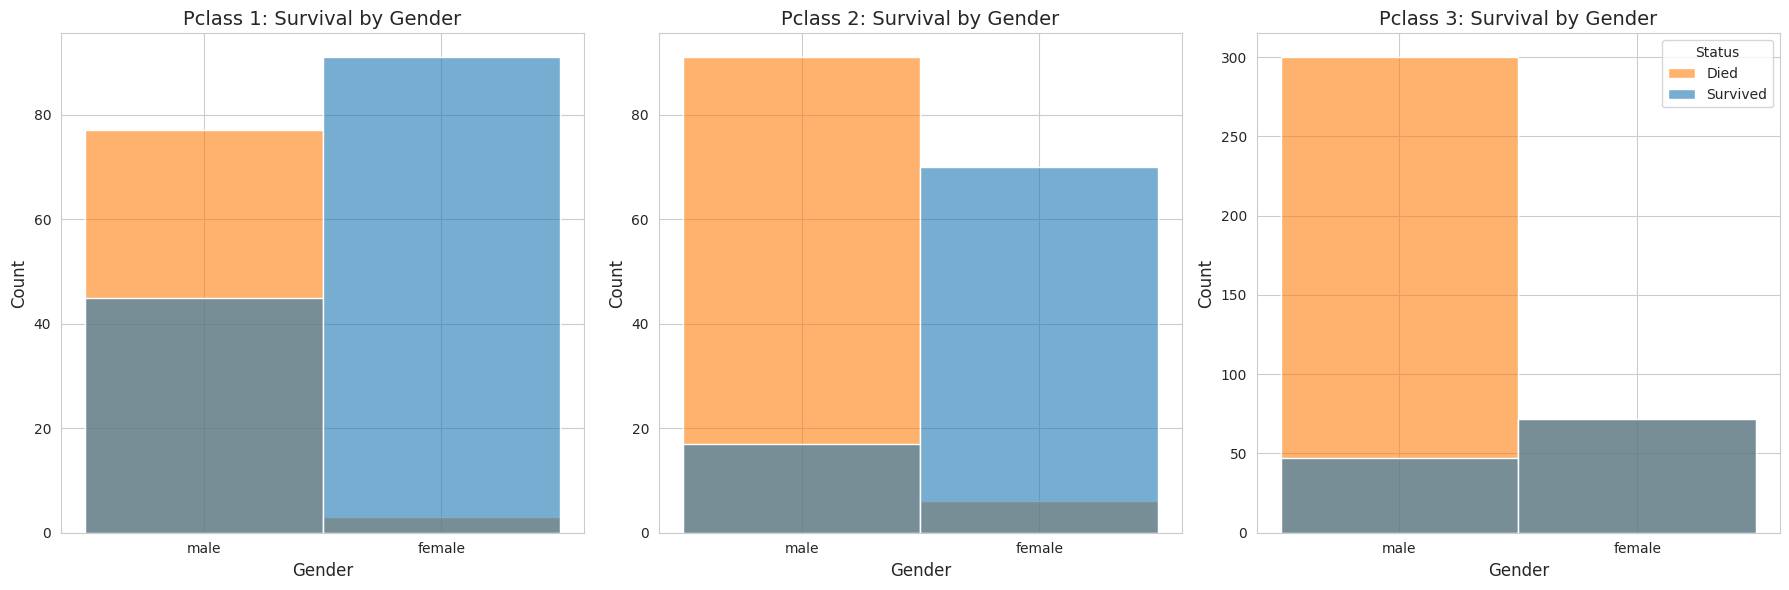

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the grid for subplots
plt.figure(figsize=(18, 6))
sns.set_style("whitegrid")

# Loop through each Pclass
for i, pclass in enumerate(sorted(train['Pclass'].unique()), 1):
    plt.subplot(1, 3, i)  # Create subplots: 1 row, 3 columns

    # Filter data for the current Pclass
    pclass_data = train[train['Pclass'] == pclass]

    # Plot histograms for males and females
    sns.histplot(
        data=pclass_data[pclass_data['Survived'] == 0],
        x='Sex',
        bins=2,
        color='#ff7f0e',  # Orange for deaths
        alpha=0.6,
        label='Died'
    )
    sns.histplot(
        data=pclass_data[pclass_data['Survived'] == 1],
        x='Sex',
        bins=2,
        color='#1f77b4',  # Blue for survivors
        alpha=0.6,
        label='Survived'
    )

    # Add titles and labels for each subplot
    plt.title(f'Pclass {pclass}: Survival by Gender', fontsize=14)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Add a legend
    if i == 3:  # Add legend to the last plot only
        plt.legend(title='Status', loc='upper right', fontsize=10)

# Adjust layout for spacing
plt.tight_layout()
plt.show()


### Observations from the Plots

#### 1. **Overall Survival Rates by Pclass**
- **First-Class (Pclass=1)** passengers had the **highest survival rate**, while **Third-Class (Pclass=3)** passengers faced the **highest mortality rate**.  
  → This suggests that **social class** significantly influenced survival during the Titanic disaster.

#### 2. **Gender Disparities in Each Pclass**
- In **First-Class**, females significantly outnumbered males and had much higher survival rates.  
  → This indicates that women in higher classes were prioritized during evacuation.  
- In **Third-Class**, the survival rate for females was lower compared to First-Class, and the number of males in this class was much higher.  
  → This contributed to the overall high mortality rate.

#### 3. **Male Mortality**
- Regardless of the Pclass, males exhibited a consistently **higher mortality rate**, particularly in First and Third-Class.  
  → This aligns with the "women and children first" protocol implemented during evacuation.

#### 4. **Class and Gender Disparities**
- The **gender imbalance** across classes is evident.  
  → **First-Class** had more females, while **Third-Class** was predominantly male.  
- This may reflect the **socioeconomic status** of passengers, with wealthier families being able to afford First-Class tickets.

---

### Next Steps for Analysis
1. **Age Analysis**  
   Investigate the role of age within each Pclass and gender group to understand additional survival factors.

2. **Family Size and Pclass**  
   Explore the relationship between family size, Pclass, and survival rates to uncover how group dynamics may have influenced outcomes.




### Investigate the relationship between age and pclass

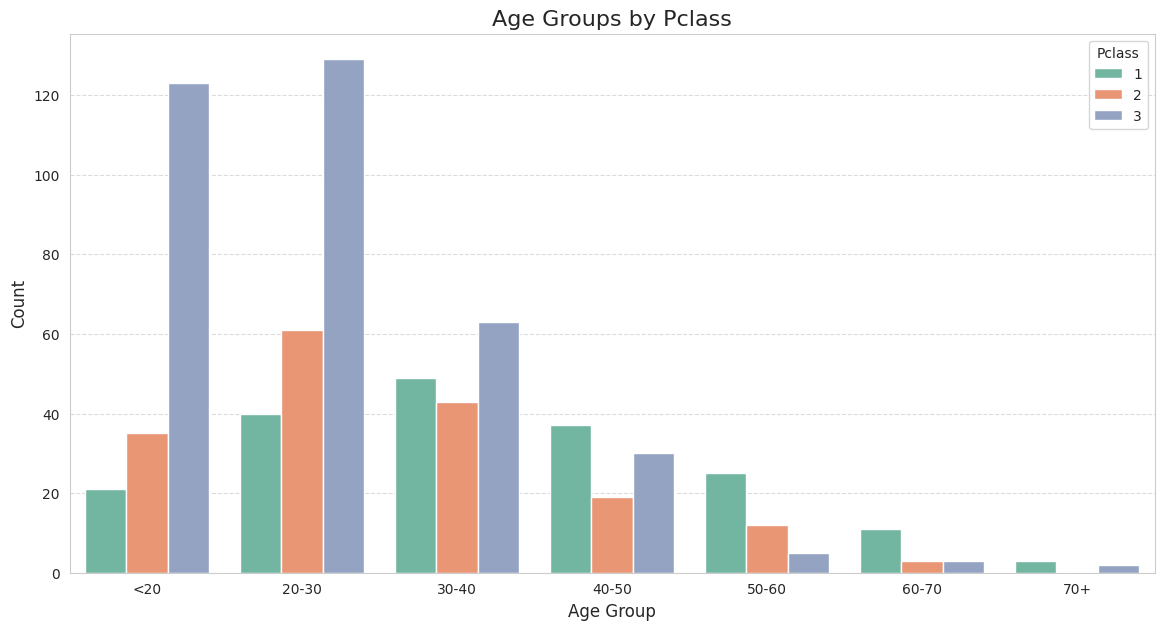

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group ages into defined ranges
bins = [0, 20, 30, 40, 50, 60, 70, 80]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
train['AgeGroup'] = pd.cut(train['Age'], bins=bins, labels=labels)

# Create the bar plot for AgeGroup and Pclass
plt.figure(figsize=(14, 7))
sns.countplot(
    data=train,
    x='AgeGroup',  # Age group on x-axis
    hue='Pclass',  # Differentiate by Pclass
    palette='Set2',  # Distinct colors for each Pclass
    dodge=True  # Separate Pclass within each AgeGroup
)

# Add title and labels
plt.title('Age Groups by Pclass', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Pclass', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Calculate the proportion and average fare for each Pclass

In [21]:
# Count the number of passengers in each Pclass
pclass_counts = train['Pclass'].value_counts()

# Calculate the percentage of each Pclass
pclass_percentages = train['Pclass'].value_counts(normalize=True) * 100

# Combine the results into a single DataFrame for clarity
pclass_summary = pd.DataFrame({
    'Count': pclass_counts,
    'Percentage (%)': pclass_percentages
})

# Calculate the average Fare for each Pclass
pclass_fare_mean = train.groupby('Pclass')['Fare'].mean()

# Print the summary
print(pclass_summary)

# Print the results
print(pclass_fare_mean)


        Count  Percentage (%)
Pclass                       
3         491       55.106622
1         216       24.242424
2         184       20.650954
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


### Calculate the average fare per passenger based on the total fare paid by all passengers.

In [23]:
# Calculate the total fare of all passengers
total_fare = train['Fare'].sum()

# Count the number of passengers
total_passengers = train.shape[0]

# Calculate the average fare per passenger
average_fare_per_passenger = total_fare / total_passengers

# Print the results
print(f"Total Fare: {total_fare}")
print(f"Total Passengers: {total_passengers}")
print(f"Average Fare per Passenger: {average_fare_per_passenger}")


Total Fare: 28693.9493
Total Passengers: 891
Average Fare per Passenger: 32.204207968574636


# Key Insights from Titanic Dataset Analysis

The Titanic is widely known as a luxury ocean liner; however, when examining the distribution of passenger classes and ticket fares, a different perspective emerges. Although the Titanic is famous for its opulence, it might have also served as a vessel for transporting a significant number of migrant workers.

## Key Observations

### Passenger Distribution
Pclass 3 passengers accounted for more than half (55.1%) of the total, suggesting a reliance on lower-class passengers for revenue. On its maiden voyage, only 1,317 passengers boarded, just 53% of the ship’s capacity, while the crew count remained at 907.

### Fare Analysis
The average fare for Pclass 1 was more than six times higher than Pclass 3, highlighting a stark economic divide between passenger classes. The overall average fare per passenger was approximately **32.20**, based on the Kaggle `train` dataset.

### Lifeboat Shortage
While outdated maritime safety regulations are widely considered the primary reason for insufficient lifeboats, financial constraints might have been one of the contributing factors. For example, prioritizing cargo space over additional lifeboats could have been seen as a cost-saving measure.

---

## Conclusion

These observations suggest that the Titanic operated under significant financial and operational pressures, balancing luxury, revenue, and safety. This imbalance might have contributed to decisions that, while financially justifiable, had tragic consequences in the event of a disaster.

---

## Next step
These observations could guide the feature engineering process, such as focusing on passenger class, age, and fare as key predictors for survival.